Arian Noori
Homework 7

# Wikipedia Wisconsin PageRank

In [1]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import eigs

edges_file = open('wisconsin_edges.csv', "r")
nodes_file = open('wisconsin_nodes.csv', "r")

# create a dictionary where nodes_dict[i] = name of wikipedia page
nodes_dict = {}
for line in nodes_file:
    nodes_dict[int(line.split(',',1)[0].strip())] = line.split(',',1)[1].strip()

node_count = len(nodes_dict)

# create adjacency matrix
A = np.zeros((node_count, node_count))
for line in edges_file:
    from_node = int(line.split(',')[0].strip())
    to_node = int(line.split(',')[1].strip())
    A[to_node, from_node] = 1.0

## Add code below to (1) prevent traps and (2) find the most important pages     
# Hint -- instead of computing the entire eigen-decomposition of a matrix X using
# s, E = np.linalg.eig(A)
# you can compute just the first eigenvector with:
# s, E = eigs(csc_matrix(A), k = 1)

# Add small probability of random jump
A = A + 0.001

# Normalize the A vector
A_norm = A / A.sum(axis=0)

# Compute the first Eigenvector
s, E = eigs(csc_matrix(A_norm), k = 1)

# Print out values in order (use -1 to get largest to smallest), 
# squeeze to get rid of the "matrix" part, and abs to take the magnitude of the ranks
rankings = np.argsort(np.squeeze(-1*np.abs(E)))
print(rankings)
print("First:" , nodes_dict[rankings[0]])
print("Second:" , nodes_dict[rankings[1]])
print("Third:" , nodes_dict[rankings[2]])

[5089 2312 1345 ... 1882   88 1211]
First: "Wisconsin"
Second: "List of counties in Wisconsin"
Third: "Madison, Wisconsin"


# Gradient Descent and Logistic Regression

### Problem 2a
The logistic loss function does not suffer the same problem from very large correctly classified points (e.g. "easy" to classify points) because the $e^{-y_i x^T w}$ term approaches 0 as the absolute value of $x_{i}^{T}w$ gets large and $ln(1+0)=0$. The logarithm also helps mitigate large values since each interval scales with the base ($e$ here for natural log).

### Problem 2b
$f(w) = ln(1+e^{-yx^T w})$

The gradient with respect to $w$ can be written as: $\nabla{f(w)}=\dfrac{\mathrm{-e}^{-yx^Tw} * yx}{\mathrm{e}^{-yx^Tw}+1} + 2\lambda w$

$\sum_{i} \dfrac{\mathrm{-e}^{-y_ix_i^Tw} * y_ix_i}{\mathrm{e}^{-y_ix_i^Tw}+1} + 2\lambda w$

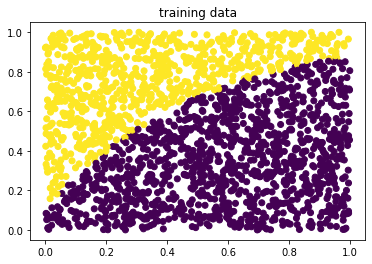

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle

pkl_file = open('classifier_data.pkl', 'rb')
x_train, y_train = pickle.load(pkl_file)

n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.title('training data')
plt.show()

### Problem 2c

In [3]:
# hint from Piazza post:
n = x_train.shape[0]
X = np.hstack([x_train, np.ones((n,1))]) # Adding 1 column
y = np.array(y_train, dtype=float)

it = 100
la = 1
tau = .001

w = np.zeros((3,1))
for i in range(it):
  gradi = 2 * la * w
  for j in range(n):
    x_j = X[[j],:].T # Note that X[[j],:] = x_j^T
    y_j = y[j]
    gradi +=  ( -np.exp(-y_j*x_j.T@w) / (1+np.exp(-y_j*x_j.T@w)) ) * y_j * x_j
  w = w - tau * gradi
  if i % 10 == 0:
    print(np.average(np.sign(X@w) == y))

print("Logistic Regression w:")
print(w)



0.615
0.8515
0.931
0.9465
0.951
0.955
0.9595
0.96
0.9625
0.963
Logistic Regression w:
[[-4.32995279]
 [ 6.12750557]
 [-1.7312845 ]]


### Problem 2d

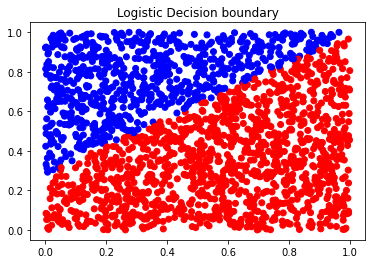

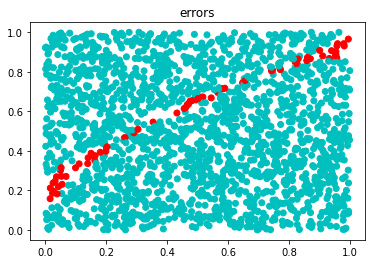

Errors:  74
%Error:  3.7


In [4]:
y_eval = np.sign(X@w)
# From activity 8:

plt.scatter(X[:,0],X[:,1], color = ['r' if i==-1 else 'b' for i in y_eval])
plt.title('Logistic Decision boundary')
plt.show()

error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_eval, y_train))]
plt.scatter(X[:,0],X[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()
print("Errors: ", sum(error_vec))
print("%Error: ", 100*sum(error_vec)/np.size(y_train))

### Problem 2e

The squared error loss has 90-73 = 17 more errors than the logistic.The errors tend to occur closer to the origin on the graph for the squared error. 

[[-1.4024338 ]
 [ 2.30646659]
 [-0.69000093]]


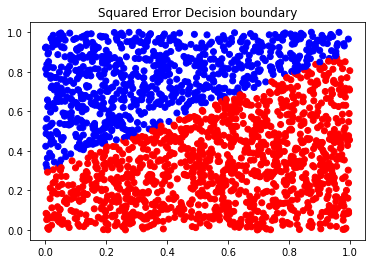

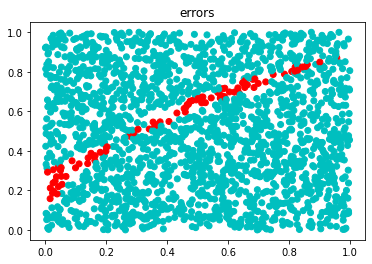

Errors:  90
%Error:  4.5


In [5]:
I = np.eye(X.shape[1])
lam = 0; # No need to do ridge regression
LI = np.multiply(I,lam)

w_opt = np.linalg.inv((X.transpose()@X) + LI)@X.transpose()@y_train
print(w_opt)
y_hat = np.sign(X@w_opt)

plt.scatter(X[:,0],X[:,1], color = ['r' if i==-1 else 'b' for i in y_hat])
plt.title('Squared Error Decision boundary')
plt.show()

error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_train, y_hat))]
plt.scatter(X[:,0],X[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()
print("Errors: ", sum(error_vec))
print("%Error: ", 100*sum(error_vec)/np.size(y_hat))

### Problem 2f
As you can see from the following example, the logistic loss has a far less percent error than the squared error loss due to the phenomena described in part a. 

In [6]:
# Add the data

i = 0
for i in range(1000):
    x_train = np.vstack( [x_train, [10,0]]) 

y_train = np.concatenate( (y, np.full( (1000,1), -1) ))

print(x_train)
print(y_train)




[[ 0.36969724  0.64696387]
 [ 0.19898362  0.52560645]
 [ 0.72201158  0.52756091]
 ...
 [10.          0.        ]
 [10.          0.        ]
 [10.          0.        ]]
[[ 1.]
 [ 1.]
 [-1.]
 ...
 [-1.]
 [-1.]
 [-1.]]


0.7433333333333333
0.8913333333333333
0.916
0.94
0.9553333333333334
0.9623333333333334
0.966
0.9656666666666667
0.9683333333333334
0.9713333333333334


 Logistic w:
[[-4.92708661]
 [ 6.41112503]
 [-1.6048185 ]]


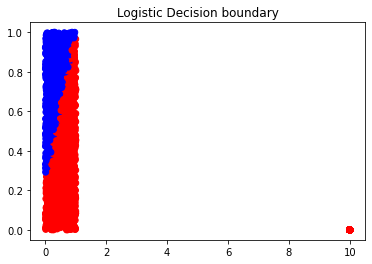

Errors:  79
%Error:  2.6333333333333333


 Squared Error w:
[[ 0.03458857]
 [ 2.27733328]
 [-1.37097124]]


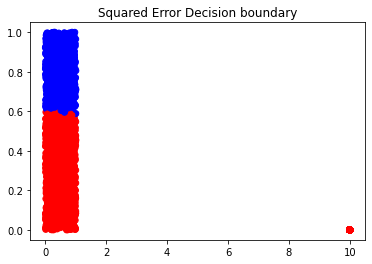

Errors:  358
%Error:  11.933333333333334


In [7]:
n = x_train.shape[0]
X = np.hstack([x_train, np.ones((n,1))]) # Adding 1 column
y = np.array(y_train, dtype=float)

it = 100
la = 1
tau = .001

w = np.zeros((3,1))
for i in range(it):
  gradi = 2 * la * w
  for j in range(n):
    x_j = X[[j],:].T # Note that X[[j],:] = x_j^T
    y_j = y[j]
    gradi +=  ( -np.exp(-y_j*x_j.T@w) / (1+np.exp(-y_j*x_j.T@w)) ) * y_j * x_j
  w = w - tau * gradi
  if i % 10 == 0:
    print(np.average(np.sign(X@w) == y))

print("\n\n Logistic w:")
print(w)

y_eval = np.sign(X@w)

plt.scatter(X[:,0],X[:,1], color = ['r' if i==-1 else 'b' for i in y_eval])
plt.title('Logistic Decision boundary')
plt.show()

error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_train, y_eval))]
print("Errors: ", sum(error_vec))
print("%Error: ", 100*sum(error_vec)/np.size(y_train))

I = np.eye(X.shape[1])
lam = 0;
LI = np.multiply(I,lam)

w_opt = np.linalg.inv((X.transpose()@X) + LI)@X.transpose()@y_train
print("\n\n Squared Error w:")
print(w_opt)
y_hat = np.sign(X@w_opt)

plt.scatter(X[:,0],X[:,1], color = ['r' if i==-1 else 'b' for i in y_hat])
plt.title('Squared Error Decision boundary')
plt.show()

error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_train, y_hat))]
print("Errors: ", sum(error_vec))
print("%Error: ", 100*sum(error_vec)/np.size(y_hat))